In [3]:
import os
import cv2
from paddleocr import PaddleOCR

In [4]:
from ultralytics import YOLO

In [22]:
model = YOLO("best.pt")

In [24]:
image_path = 'images.jpeg'
results = model(image_path)
results[0].show()


image 1/1 /home/abdulrehman/dev/ML1/CNIC_TextDetector/images.jpeg: 416x640 18 texts, 228.7ms
Speed: 12.1ms preprocess, 228.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)



0: 512x640 15 texts, 211.5ms
Speed: 6.1ms preprocess, 211.5ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


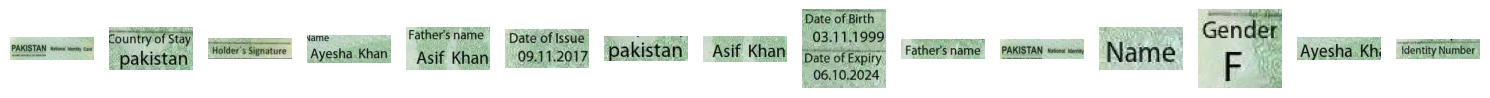

In [17]:
import matplotlib.pyplot as plt


def detect_and_crop_single_image(image_path, model, threshold=0.15):
    image = cv2.imread(image_path)
    results = model(image)[0]
    cropped_images = []
    for x1, y1, x2, y2, score, class_id in results.boxes.data.tolist():
        if score > threshold:
            cropped_image = image[int(y1):int(y2), int(x1):int(x2)]
            cropped_images.append(cropped_image)
    return cropped_images

# Example usage
model = YOLO('best.pt')

cropped_images = detect_and_crop_single_image('4.jpg', model)

# Display the cropped images
fig, axs = plt.subplots(1, len(cropped_images), figsize=(15, 15))
if len(cropped_images) == 1:
    axs = [axs]  # Ensure axs is iterable

for ax, cropped_image in zip(axs, cropped_images):
    cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    ax.imshow(cropped_image_rgb)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [18]:
from IPython.display import clear_output
def apply_ocr_to_images(cropped_images, ocr_model):
    extracted_texts = []
    for cropped_image in cropped_images:
        result = ocr_model.ocr(cropped_image, cls=False)
        if result and result[0]:  # Check if result is not None and not empty
            text = " ".join([line[1][0] for line in result[0]])
            extracted_texts.append(text)
        else:
            extracted_texts.append("No text detected")  # Handle empty result
    return extracted_texts

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Apply OCR to cropped images
extracted_texts = apply_ocr_to_images(cropped_images, ocr)

clear_output()
for i in extracted_texts:
    print(i)

PAKISTAN National Identity Card SLAMIC REPUBLIC OF PAKISTAN
Country of Stay pakistan
Holder's Signature
Name Ayesha Khan
Father's name Asif Khan
Date of Issue 09.11.2017
pakistan
Asif Khan
Date of Birth 03.11.1999 Date of Expiry 06.10.2024
Father's name
PAKISTAN National Identit
Name
Gender F
Ayesha Kh
Identity Number
